# Jupyter Notebook Tutorial: Data Science Project 

This is a Data Science Project for finding out how the profits of the largest companies in the US changed historically. The data set of Fortune 500 companies spanning over 50 years since the list’s first publication in 1955, put together from [Fortune’s public archive](http://archive.fortune.com/magazines/fortune/fortune500_archive/full/2005/). We have a csv of the data created in the main folder namded, `fortune500.csv`.

## Setup

It’s common to start off with a code cell specifically for imports and setup, so that if we choose to add or change anything, we can simply edit and re-run the cell without causing any side-effects.

In [1]:
# This  isn’t a Python command, but uses something called a line magic to instruct Jupyter to capture Matplotlib plots 
# and render them in the cell output
%matplotlib inline


# Initial setup
# We aren't using numpy here as pandas library already has a numpy reference
# We're using pandas to work with our data, Matplotlib to plot charts, and Seaborn to make our charts prettier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

In [2]:
# Read the input csv file containing profits of the largest companies in the US
df = pd.read_csv('fortune500.csv')

## Investigating our data set:

We would now be investigating the dataset and cleaning up unnecessary records.

In [3]:
# Investigating our data set
df.head()

Year  Rank           Company  Revenue (in millions) Profit (in millions)
0  1955     1    General Motors                 9823.5                  806
1  1955     2       Exxon Mobil                 5661.4                584.8
2  1955     3        U.S. Steel                 3250.4                195.4
3  1955     4  General Electric                 2959.1                212.6
4  1955     5            Esmark                 2510.8                 19.1

In [4]:
# Investigating our data set
df.tail()

Year  Rank                Company  Revenue (in millions)  \
25495  2005   496        Wm. Wrigley Jr.                 3648.6   
25496  2005   497         Peabody Energy                 3631.6   
25497  2005   498  Wendy's International                 3630.4   
25498  2005   499     Kindred Healthcare                 3616.6   
25499  2005   500   Cincinnati Financial                 3614.0   

      Profit (in millions)  
25495                  493  
25496                175.4  
25497                 57.8  
25498                 70.6  
25499                  584

In [5]:
# Assigning the names of columns to specific variables
df.columns = ['year', 'rank', 'company', 'revenue', 'profit']

In [6]:
# Number of rows in the dataset
len(df)

25500

In [7]:
# Data types of different columns in the dataset
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

As we can see that the data type for the profit column should be `float64`. This indicates that it probably contains some non-integer values.

In [8]:
# Investigating the profits column data for non-integer values
non_numberic_profits = df.profit.str.contains('[^0-9.-]')
df.loc[non_numberic_profits].head()

year  rank                company  revenue profit
228  1955   229                 Norton    135.0   N.A.
290  1955   291        Schlitz Brewing    100.0   N.A.
294  1955   295  Pacific Vegetable Oil     97.9   N.A.
296  1955   297     Liebmann Breweries     96.0   N.A.
352  1955   353     Minneapolis-Moline     77.4   N.A.

In [9]:
# Checking if there any other values that have crept in
set(df.profit[non_numberic_profits])

{'N.A.'}

In [10]:
# Number of non-integer records
len(df.profit[non_numberic_profits])

369

It’s a small fraction of our data set, though not completely inconsequential as it is still around 1.5%. If rows containing `N.A.` are, roughly, uniformly distributed over the years, the easiest solution would just be to remove them. So let's have a quick look at the distribution.

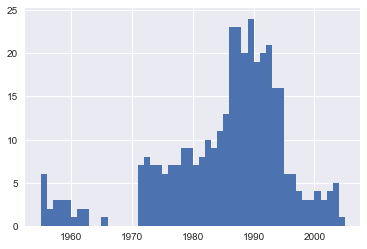

In [11]:
# Checking the distribution
bin_sizes, _, _ = plt.hist(df.year[non_numberic_profits], bins=range(1955, 2006))

In [12]:
# Removing the non-integer records from the dataset
df = df.loc[~non_numberic_profits]
df.profit = df.profit.apply(pd.to_numeric)

In [13]:
# Remaining data
len(df)

25131

In [14]:
# Checking the data types again after removing the non-integer records
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

## Plotting with matplotlib:
Next, we can get to addressing the question at hand by plotting the average profit by year.

In [15]:
# Reducing our code by defining some variables
group_by_year = df.loc[:, ['year', 'revenue', 'profit']].groupby('year')
avgs = group_by_year.mean()
x = avgs.index
y1 = avgs.profit

def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)

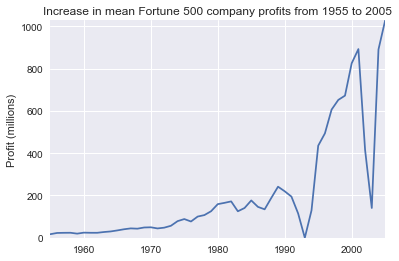

In [16]:
# Plotting the data
fig, ax = plt.subplots()
plot(x, y1, ax, 'Increase in mean Fortune 500 company profits from 1955 to 2005', 'Profit (millions)')

The curves look exponential, but it’s got some huge dips. They must correspond to the early 1990s recession and the dot-com bubble. It’s pretty interesting to see that in the data. Now we need to check how profits recovered to even higher levels post each recession by taking a look at the revenues.

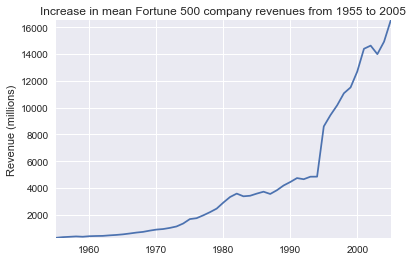

In [17]:
# Investigating Revenues
y2 = avgs.revenue
fig, ax = plt.subplots()
plot(x, y2, ax, 'Increase in mean Fortune 500 company revenues from 1955 to 2005', 'Revenue (millions)')

Revenues were no way nearly as badly hit as seen above.

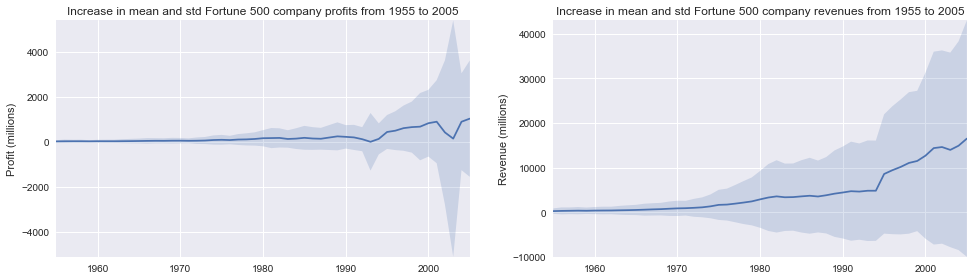

In [18]:
# superimpose these plots with +/- their standard deviations
def plot_with_std(x, y, stds, ax, title, y_label):
    ax.fill_between(x, y - stds, y + stds, alpha=0.2)
    plot(x, y, ax, title, y_label)

fig, (ax1, ax2) = plt.subplots(ncols=2)
title = 'Increase in mean and std Fortune 500 company %s from 1955 to 2005'
stds1 = group_by_year.std().profit.as_matrix()
stds2 = group_by_year.std().revenue.as_matrix()
plot_with_std(x, y1.as_matrix(), stds1, ax1, title % 'profits', 'Profit (millions)')
plot_with_std(x, y2.as_matrix(), stds2, ax2, title % 'revenues', 'Revenue (millions)')
fig.set_size_inches(14, 4)
fig.tight_layout()

That’s staggering, the standard deviations are huge. Some Fortune 500 companies make billions while others lose billions, and the risk has increased along with rising profits over the years. Perhaps some companies perform better than others.